In [1]:
## a. Importing necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [2]:
## b. Load the train and test dataset
path = "mnist.npz"
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path)

In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
## c. Define the network architecture using keras
model=keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
#d. train the model using sgd
model.compile(optimizer="sgd", 
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

In [7]:
history=model.fit(x_train, y_train, 
validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6389 - accuracy: 0.8364 - val_loss: 0.3608 - val_accuracy: 0.9010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3388 - accuracy: 0.9058 - val_loss: 0.2944 - val_accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2902 - accuracy: 0.9188 - val_loss: 0.2622 - val_accuracy: 0.9251
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2601 - accuracy: 0.9275 - val_loss: 0.2384 - val_accuracy: 0.9318
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2374 - accuracy: 0.9338 - val_loss: 0.2203 - val_accuracy: 0.9367
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2190 - accuracy: 0.9395 - val_loss: 0.2077 - val_accuracy: 0.9403
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2040 - accuracy: 0.9428 - val_loss: 0.1934 - val_accuracy:

In [8]:
#e. evaluate the network
test_loss, test_acc=model.evaluate(x_test, y_test)
print("loss = ",test_loss)
print("acc = ",test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1660 - accuracy: 0.9525
loss =  0.16603441536426544
acc =  0.9524999856948853


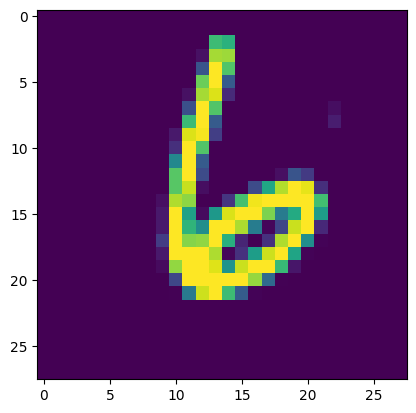

In [10]:
n=random.randint(0, 9999)
plt.imshow(x_test[n])
plt.show()

In [11]:
predicted_value=model.predict(x_test)
print("Predicted value: ",predicted_value)

313/313 [==============================] - 1s 2ms/step
Predicted value:  [[6.5126886e-05 4.2266599e-08 6.6000276e-04 ... 9.9601626e-01
  1.5807294e-05 2.2917932e-04]
 [1.1532435e-03 1.3291062e-04 9.8213315e-01 ... 8.2766333e-10
  1.1003313e-03 8.9617505e-09]
 [3.6088746e-05 9.7068077e-01 8.3157672e-03 ... 6.8760319e-03
  4.5802784e-03 7.9048239e-04]
 ...
 [4.6462638e-08 9.0538940e-08 1.6974618e-06 ... 1.8561546e-04
  1.5633027e-03 5.7727746e-03]
 [7.0269074e-05 3.8744442e-05 7.1466884e-06 ... 2.4502399e-06
  5.3222929e-03 1.3999900e-06]
 [1.7479346e-04 2.5845253e-09 8.6016464e-04 ... 3.5816916e-10
  1.3387853e-06 2.9579948e-07]]


<function matplotlib.pyplot.show(close=None, block=None)>

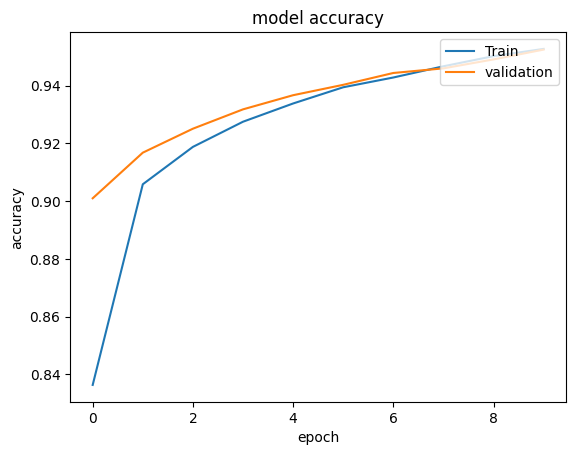

In [12]:
# f. Plotting training loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

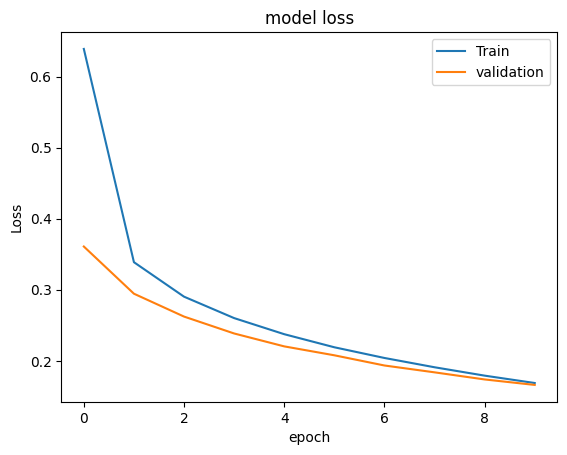

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'validation'], loc='upper right')
plt.show